<a href="https://colab.research.google.com/github/tns7ny/DS2002F24/blob/main/tns7ny_sqlite_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# PART 1-1
# Create a connection
import sqlite3

connection = sqlite3.connect('student_grades.db')

print("student_grades database created and connected!")

student_grades database created and connected!


In [90]:
# PART 1-2
# Create a cursor
cursor = connection.cursor()

print("Cursor created!")

Cursor created!


In [91]:
# PART 2
# Create students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

print("Students table created!")

Students table created!


In [92]:
# PART 2
# Create grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Grades table created!")

Grades table created!


In [93]:
# PART 3
# Insert student data into table
student_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name)
VALUES (?, ?)
''', student_data)


connection.commit()
print("Data inserted into the students table!")

Data inserted into the students table!


In [94]:
# PART 3
# Insert grades data into table
grade_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 91),
    (3, 'English', 87),
    (3, 'History', 93),
    (4, 'Math', 89),
    (4, 'English', 90),
    (4, 'History', 92),
    (5, 'Math', 80),
    (5, 'English', 85),
    (5, 'History', 87)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade)
VALUES (?, ?, ?)
''', grade_data)

connection.commit()
print("Data inserted into the grades table!")

Data inserted into the grades table!


In [95]:
# PART 4-1
# Retrieve all students' names and their grades
cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')
rows = cursor.fetchall()

print("All students' names and their grades:")
for row in rows:
    print(f"{row[0]} {row[1]} - {row[2]}: {row[3]}")

All students' names and their grades:
Alice Johnson - Math: 95
Alice Johnson - English: 88
Alice Johnson - History: 90
Bob Smith - Math: 82
Bob Smith - English: 76
Bob Smith - History: 85
Carol White - Math: 91
Carol White - English: 87
Carol White - History: 93
David Brown - Math: 89
David Brown - English: 90
David Brown - History: 92
Eve Davis - Math: 80
Eve Davis - English: 85
Eve Davis - History: 87


In [96]:
# PART 4-2
# Find the average grade for each student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
rows = cursor.fetchall()

print("Average grade for each student:")
for row in rows:
    print(f"{row[0]} {row[1]} - Avg Grade: {row[2]:.2f}")


Average grade for each student:
Alice Johnson - Avg Grade: 91.00
Bob Smith - Avg Grade: 81.00
Carol White - Avg Grade: 90.33
David Brown - Avg Grade: 90.33
Eve Davis - Avg Grade: 84.00


In [97]:
# PART 4-3
# Find the student with the highest average grade
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY avg_grade DESC
LIMIT 1
''')
row = cursor.fetchone()

print(f"Student with the highest average grade: {row[0]} {row[1]} - Avg Grade: {row[2]:.2f}")


Student with the highest average grade: Alice Johnson - Avg Grade: 91.00


In [98]:
# PART 4-4
# Find the average grade for the Math subject
cursor.execute('''
SELECT AVG(grades.grade) as avg_math_grade
FROM grades
WHERE grades.subject = 'Math'
''')
row = cursor.fetchone()

print(f"Average grade for Math: {row[0]:.2f}")


Average grade for Math: 87.40


In [99]:
# PART 4-5
# List all students who scored above 90 in any subject
cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')
rows = cursor.fetchall()

print("Students who scored above 90 in any subject:")
for row in rows:
    print(f"{row[0]} {row[1]} - {row[2]}: {row[3]}")

Students who scored above 90 in any subject:
Alice Johnson - Math: 95
Carol White - Math: 91
Carol White - History: 93
David Brown - History: 92


In [100]:
# PART 5-1
import pandas as pd

# Pandas df for students
students_df = pd.read_sql_query('SELECT * FROM students', connection)
students_df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [101]:
# PART 5-1
# Pandas df for grades
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)
grades_df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [102]:
# PART 5-2
# JOIN into single df that includes each student's name, subject, and grade
df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)
df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


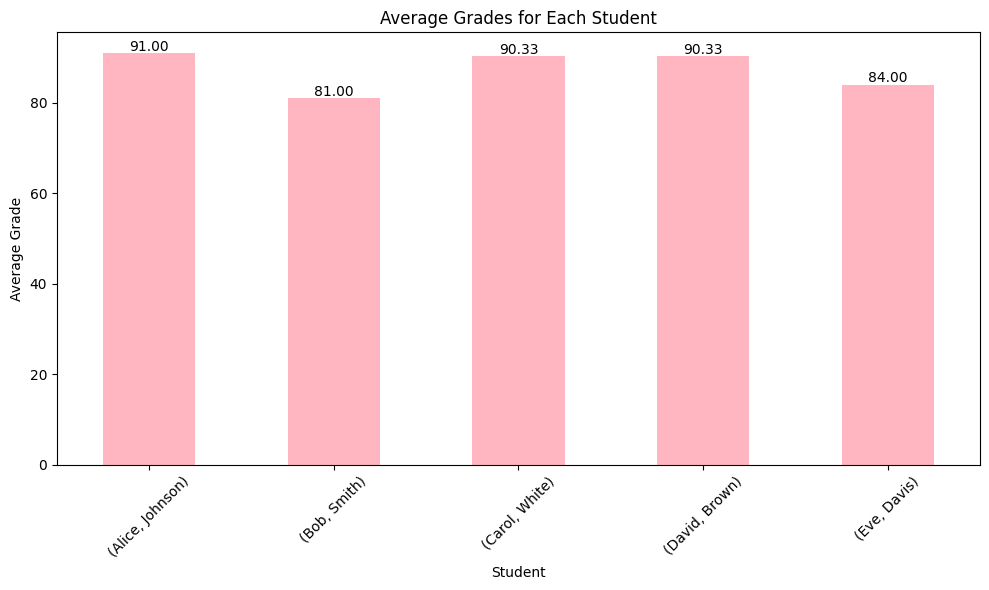

In [103]:
# PART 5-3-1
# Using Matplotlib: Plot the average grades for each student
import matplotlib.pyplot as plt

avg_grades = df.groupby(['first_name', 'last_name'])['grade'].mean()
plt.figure(figsize=(10, 6))
ax = avg_grades.plot(kind='bar', color='lightpink')

plt.title('Average Grades for Each Student')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)

for i, v in enumerate(avg_grades):
    ax.text(i, v + 0.5, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

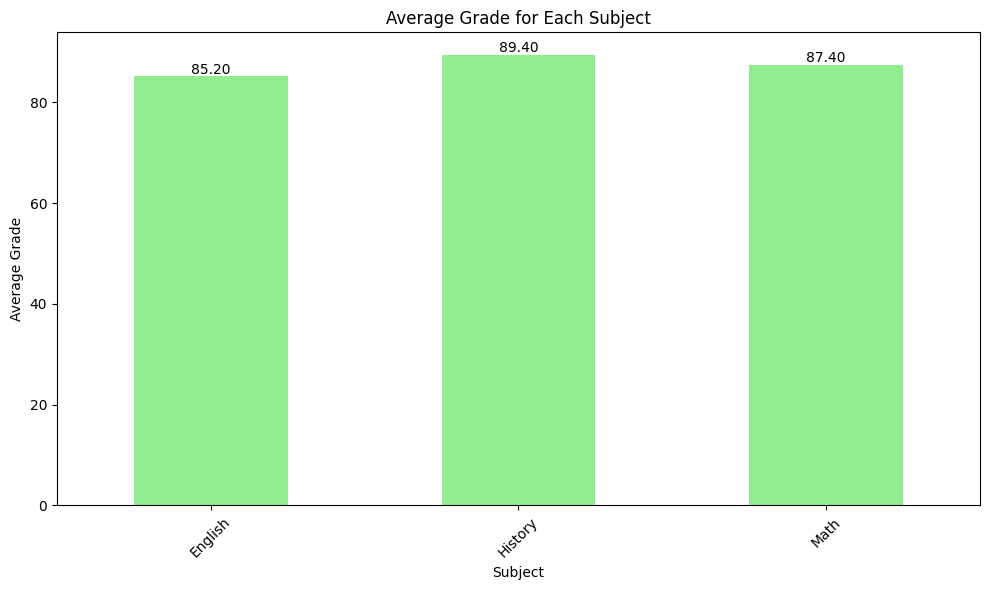

In [108]:
# PART 5-3-2
# Using Matplotlib: Create a bar chart showing the average grade for each subject

avg_grades = df.groupby('subject')['grade'].mean()
plt.figure(figsize=(10, 6))
ax = avg_grades.plot(kind='bar', color='lightgreen')

plt.title('Average Grade for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)

for i, v in enumerate(avg_grades):
    ax.text(i, v + 0.5, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [105]:
# BONUS TASK 1
# Implement a query that finds the student with the highest grade in each subject
cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (
    SELECT subject, MAX(grade)
    FROM grades
    GROUP BY subject
)
''')


rows = cursor.fetchall()

print("Student with the highest grade in each subject:")
for row in rows:
    print(f"{row[0]} {row[1]} - {row[2]}: {row[3]}")

Student with the highest grade in each subject:
Alice Johnson - Math: 95
Carol White - History: 93
David Brown - English: 90


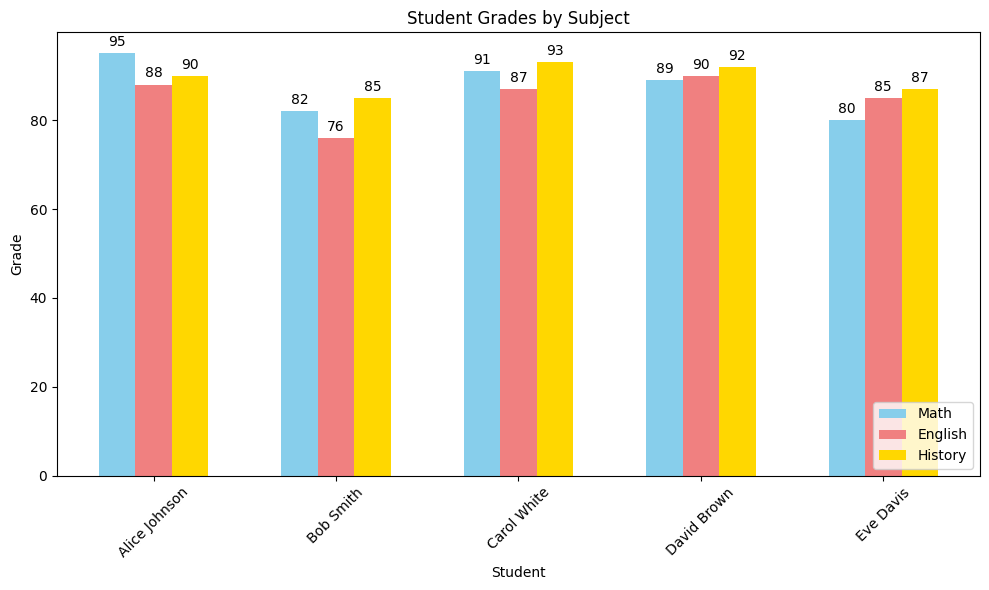

In [106]:
# BONUS TASK 2
# Visualize the results using a grouped bar chart

import pandas as pd
import matplotlib.pyplot as plt

# Convert grade_data to dictionary
grades_dict = {}
for student_id, subject, grade in grade_data:
  if student_id not in grades_dict:
    grades_dict[student_id] = {}
  grades_dict[student_id][subject] = grade

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
subjects = ['Math', 'English', 'History']
colors = ['skyblue', 'lightcoral', 'gold']
x = range(len(student_data))

for i, subject in enumerate(subjects):
  y = [grades_dict[j+1][subject] for j in x]
  bars = ax.bar([p + i * bar_width for p in x], y, bar_width, label=subject, color=colors[i])

  # Add labels to the top of the bars
  for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels([f"{student[0]} {student[1]}" for student in student_data], rotation=45)
ax.set_xlabel('Student')
ax.set_ylabel('Grade')
ax.set_title('Student Grades by Subject')
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [107]:
# Close the cursor
cursor.close()
print("Cursor closed!")

Cursor closed!
